In [1]:
import os    
#os.environ['THEANO_FLAGS'] = "device=gpu1"  
#os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu0,floatX=float32,lib.cnmem=1"
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu0,floatX=float32"
import theano
import numpy as np
from keras.layers import Input, Dense, convolutional,Reshape, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras.models import Model
from keras.optimizers import *

%matplotlib inline






Couldn't import dot_parser, loading of dot files will not be possible.


Using gpu device 0: GeForce 920M (CNMeM is disabled, cuDNN not available)
Using Theano backend.


In [24]:
# this is our input placeholder
input_img = Input(shape=(3,32,32))

x = convolutional.Convolution2D(16, 5, 5, activation='relu', border_mode='same')(input_img)##64, 28, 28
x = convolutional.MaxPooling2D((2, 2), border_mode='same')(x)##64, 14, 14
x = convolutional.Convolution2D(20, 5, 5, activation='relu', border_mode='same')(x) ##32, 12, 12
x = convolutional.MaxPooling2D((2, 2), border_mode='same')(x) ##32, 6, 6
x = convolutional.Convolution2D(20, 5, 5, activation='relu', border_mode='same')(x) ##16, 4, 4
#x = convolutional.MaxPooling2D((2, 2), border_mode='same')(x) ##32, 6, 6
#x = convolutional.Convolution2D(1, 1, 1, activation='relu', border_mode='same')(x) ##16, 4, 4
encoded = convolutional.MaxPooling2D((2, 2), border_mode='same')(x) ##16, 2, 2
#x = Flatten()(encoded) ##64
#encoded = Dense(40, activation='sigmoid')(x)
#x= Dense (64, activation = 'linear')(x)
#x = Reshape((16,2,2))(x) ##128, 4, 4
x = convolutional.UpSampling2D((2, 2))(encoded) 
#x = convolutional.Convolution2D(1, 1, 1, activation='relu', border_mode='same')(x) ##16, 4, 4
#x = convolutional.UpSampling2D((2, 2))(x) 
x = convolutional.Convolution2D(20, 5, 5, activation='relu', border_mode='same')(x) 
x = convolutional.UpSampling2D((2, 2))(x) 
x = convolutional.Convolution2D(20, 5, 5, activation='relu', border_mode='same')(x) 
x = convolutional.UpSampling2D((2, 2))(x)
x = convolutional.Convolution2D(16, 5, 5, activation='relu',border_mode='same')(x) ##32, 16, 16
decoded = convolutional.Convolution2D(3, 5, 5, activation='sigmoid', border_mode='same')(x) ##3, 32, 32
#x = Flatten()(x) ##3072
#x = Dense(3072, activation='linear')(x)
#decoded = Reshape((3,32,32))(x) ##3, 32, 32
#decoded = convolutional.Convolution2D(3, 5, 5, activation='sigmoid', border_mode='same')(x)
autoencoder = Model(input_img, decoded)
#sgd=SGD(lr=0.002, momentum=0.1, decay=0.0, nesterov=False)
autoencoder.compile(optimizer='Adam', loss='mean_squared_error',metrics=['accuracy'])

In [25]:
autoencoder.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_5 (InputLayer)             (None, 3, 32, 32)     0                                            
____________________________________________________________________________________________________
convolution2d_34 (Convolution2D) (None, 16, 32, 32)    1216        input_5[0][0]                    
____________________________________________________________________________________________________
maxpooling2d_17 (MaxPooling2D)   (None, 16, 16, 16)    0           convolution2d_34[0][0]           
____________________________________________________________________________________________________
convolution2d_35 (Convolution2D) (None, 20, 16, 16)    8020        maxpooling2d_17[0][0]            
___________________________________________________________________________________________

In [10]:
X_train=np.load('/media/mrafi123/UStore/Dimensionality-Reduction/data/CIFAR10/X_train.npy')
X_test=np.load('/media/mrafi123/UStore/Dimensionality-Reduction/data/CIFAR10/X_test.npy')
y_train=np.load('/media/mrafi123/UStore/Dimensionality-Reduction/data/CIFAR10/y_train.npy')
y_test=np.load('/media/mrafi123/UStore/Dimensionality-Reduction/data/CIFAR10/y_test.npy')

In [26]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [12]:
x_train = X_train.astype('float32') / 255.
x_test = X_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(50000, 3072)
(10000, 3072)


In [13]:
x_train = x_train.reshape((len(x_train),3,32,32))
x_test = x_test.reshape((len(x_test),3,32,32))
print (x_train.shape)
print (x_test.shape)

(50000, 3, 32, 32)
(10000, 3, 32, 32)


In [27]:
# this model maps an input to its encoded representation
#encoding_dim=40
#encoded = convolutional.Convolution2D(3, 5, 5, activation='relu', border_mode='same')(encoded)
encoded = Flatten()(encoded)
#encoded = Dense(encoding_dim, activation='sigmoid')(encoded)
#encoded = convolutional.Convolution2D(3, 5, 5, activation='relu', border_mode='same')(encoded)
#encoded = Reshape((3,32,32))(encoded) ##3, 32, 32

encoder = Model(input_img, encoded)

In [28]:
print (encoder.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_5 (InputLayer)             (None, 3, 32, 32)     0                                            
____________________________________________________________________________________________________
convolution2d_34 (Convolution2D) (None, 16, 32, 32)    1216        input_5[0][0]                    
____________________________________________________________________________________________________
maxpooling2d_17 (MaxPooling2D)   (None, 16, 16, 16)    0           convolution2d_34[0][0]           
____________________________________________________________________________________________________
convolution2d_35 (Convolution2D) (None, 20, 16, 16)    8020        maxpooling2d_17[0][0]            
___________________________________________________________________________________________

In [29]:
nb_epoch=10
batch_size=64
random_state =5578

In [30]:
kfold_weights_path = os.path.join('weights_kfold_' +  'CIFAR10-Conv-AutoEncoder-Ver6' +
                                  '_epoch_'+str(nb_epoch)+
                                  '_batch_'+str(batch_size)
                                  +'.h5')
print(kfold_weights_path)

weights_kfold_CIFAR10-Conv-AutoEncoder-Ver6_epoch_10_batch_64.h5


In [31]:
os.path.isfile(kfold_weights_path)

True

In [32]:
# Some transfer learning
if os.path.isfile(kfold_weights_path):
    print ('Loading already stored weights...')
    autoencoder.load_weights(kfold_weights_path)
else:
    print ('Training for the first time...')
    

Loading already stored weights...


In [33]:
callbacks = [
                EarlyStopping(monitor='val_loss', patience=2, verbose=1),
                ModelCheckpoint(kfold_weights_path, monitor='val_loss', save_best_only=True, verbose=1),
            ]
autoencoder.fit(x_train, x_train,
            nb_epoch=nb_epoch,
            batch_size=batch_size,
            shuffle=True,
            validation_data=(x_test, x_test),
            callbacks=callbacks
            )

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 276s - loss: 0.0119 - acc: 0.1582 - val_loss: 0.0089 - val_acc: 0.1753
Epoch 2/10
50000/50000 [==============================] - 275s - loss: 0.0089 - acc: 0.1778 - val_loss: 0.0088 - val_acc: 0.1790
Epoch 3/10
50000/50000 [==============================] - 281s - loss: 0.0086 - acc: 0.1827 - val_loss: 0.0085 - val_acc: 0.1863
Epoch 4/10
50000/50000 [==============================] - 279s - loss: 0.0084 - acc: 0.1873 - val_loss: 0.0083 - val_acc: 0.1943
Epoch 5/10
50000/50000 [==============================] - 279s - loss: 0.0083 - acc: 0.1907 - val_loss: 0.0081 - val_acc: 0.1943
Epoch 6/10
50000/50000 [==============================] - 275s - loss: 0.0081 - acc: 0.1938 - val_loss: 0.0082 - val_acc: 0.1921
Epoch 7/10
50000/50000 [==============================] - 275s - loss: 0.0080 - acc: 0.1964 - val_loss: 0.0081 - val_acc: 0.2033
Epoch 8/10
50000/50000 [=======================

In [34]:
autoencoder.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_5 (InputLayer)             (None, 3, 32, 32)     0                                            
____________________________________________________________________________________________________
convolution2d_34 (Convolution2D) (None, 16, 32, 32)    1216        input_5[0][0]                    
____________________________________________________________________________________________________
maxpooling2d_17 (MaxPooling2D)   (None, 16, 16, 16)    0           convolution2d_34[0][0]           
____________________________________________________________________________________________________
convolution2d_35 (Convolution2D) (None, 20, 16, 16)    8020        maxpooling2d_17[0][0]            
___________________________________________________________________________________________

In [49]:
reconstructed_test_imgs = autoencoder.predict(x_test)


In [50]:
reconstructed_test_imgs.shape

(10000, 3, 32, 32)

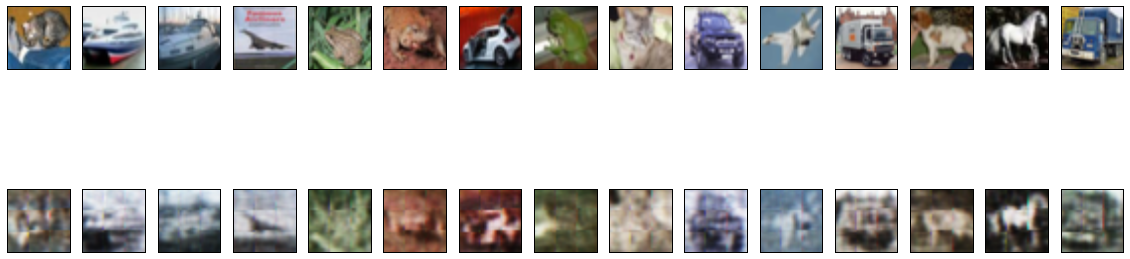

In [51]:
import matplotlib.pyplot as plt

n = 15  # how many digits we will display
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32,32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded
    #ax = plt.subplot(2, n, i + 1 + n)
    #plt.imshow(encoded_imgs[i].reshape(6, 6))
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
   
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_test_imgs[i].reshape(32,32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [52]:
print (encoder.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_5 (InputLayer)             (None, 3, 32, 32)     0                                            
____________________________________________________________________________________________________
convolution2d_34 (Convolution2D) (None, 16, 32, 32)    1216        input_5[0][0]                    
____________________________________________________________________________________________________
maxpooling2d_17 (MaxPooling2D)   (None, 16, 16, 16)    0           convolution2d_34[0][0]           
____________________________________________________________________________________________________
convolution2d_35 (Convolution2D) (None, 20, 16, 16)    8020        maxpooling2d_17[0][0]            
___________________________________________________________________________________________

In [53]:
encoded_train_imgs = encoder.predict(x_train)
print (encoded_train_imgs.size)
print (encoded_train_imgs.shape)
print (encoded_train_imgs.nbytes)

16000000
(50000, 320)
128000000


In [54]:
encoded_test_imgs = encoder.predict(x_test)
print (encoded_test_imgs.size)
print (encoded_test_imgs.shape)
print (encoded_test_imgs.nbytes)

3200000
(10000, 320)
25600000


In [41]:
encoded_train_imgs

array([[ 0.33400866,  0.45402157,  0.38493001, ...,  0.28194341,
         0.38264236,  0.29784724],
       [ 0.59191471,  0.54296523,  0.65370244, ...,  0.03319012,
         0.        ,  0.20032632],
       [ 0.90018409,  1.05956173,  0.80490148, ...,  0.19315264,
         0.09414829,  0.1483444 ],
       ..., 
       [ 0.58367133,  0.72425348,  0.72723997, ...,  0.        ,
         0.06959724,  0.        ],
       [ 0.80834037,  1.05775142,  0.86851859, ...,  0.38932359,
         0.54896444,  0.3222715 ],
       [ 0.41903096,  0.45647085,  0.39477855, ...,  0.16090223,
         0.07057728,  0.0392497 ]])

In [42]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)
clf = clf.fit(encoded_train_imgs, y_train)

In [43]:
y_pred = clf.predict(encoded_test_imgs)


In [44]:
y_pred

array([3, 8, 8, ..., 5, 6, 4])

In [45]:
num=len(encoded_test_imgs)
r=0
w=0
for i in range(num):
        #print ('y_pred ',y_pred[i])
        #print ('labels ',labels[i])
        #without the use of all() returns error truth value of an array with more than one element is ambiguous
        #if y_pred[i].all() == labels[i].all():
        if np.array_equal(y_pred[i],y_test[i]):
            r+=1
        else:
            w+=1
print ("tested ",  num, "digits")
print ("correct: ", r, "wrong: ", w, "error rate: ", float(w)*100/(r+w), "%")
print ("got correctly ", float(r)*100/(r+w), "%")


tested  10000 digits
correct:  3595 wrong:  6405 error rate:  64.05 %
got correctly  35.95 %


In [46]:
input_dim = Input(shape=(320,))
x = Dense(100, activation='relu')(input_dim)
classifier = Dense(10, activation='softmax')(x)
nn = Model(input=input_dim, output=classifier)

nn.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [47]:
from keras.utils.np_utils import *

label_train=to_categorical(y_train)
label_test= to_categorical(y_test)
print (label_train.shape)
print (label_test.shape)

(50000, 10)
(10000, 10)


In [48]:
nn.fit(encoded_train_imgs, label_train,
            nb_epoch=100,
            batch_size=batch_size,
            shuffle=True)

Epoch 1/100
50000/50000 [==============================] - 2s - loss: 2.1260 - acc: 0.2314     
Epoch 2/100
50000/50000 [==============================] - 1s - loss: 1.9863 - acc: 0.2988     
Epoch 3/100
50000/50000 [==============================] - 1s - loss: 1.9233 - acc: 0.3223     
Epoch 4/100
50000/50000 [==============================] - 1s - loss: 1.8837 - acc: 0.3389     
Epoch 5/100
50000/50000 [==============================] - 1s - loss: 1.8547 - acc: 0.3479     
Epoch 6/100
50000/50000 [==============================] - 2s - loss: 1.8334 - acc: 0.3555     
Epoch 7/100
50000/50000 [==============================] - 1s - loss: 1.8154 - acc: 0.3617     
Epoch 8/100
50000/50000 [==============================] - 1s - loss: 1.7998 - acc: 0.3680     
Epoch 9/100
50000/50000 [==============================] - 1s - loss: 1.7859 - acc: 0.3708     
Epoch 10/100
50000/50000 [==============================] - 1s - loss: 1.7731 - acc: 0.3775     
Epoch 11/100
50000/50000 [=============

In [33]:
label_y_pred = nn.predict(encoded_test_imgs)


In [34]:
new_y_pred=[]
for i in range (len(label_y_pred)):
    new_y_pred.append([np.argmax(label_y_pred[i])])


In [35]:
new_y_pred=np.asarray(new_y_pred)

In [36]:
print (new_y_pred.shape)
new_y_pred=to_categorical(new_y_pred)
print (new_y_pred.shape)


(10000, 1)
(10000, 10)


In [37]:
num=len(label_y_pred)
r=0
w=0
for i in range(num):
        #print ('y_pred ',y_pred[i])
        #print ('labels ',labels[i])
        #without the use of all() returns error truth value of an array with more than one element is ambiguous
        #if y_pred[i].all() == labels[i].all():
        if np.array_equal(new_y_pred[i],label_test[i]):
            r+=1
        else:
            w+=1
print ("tested ",  num, "digits")
print ("correct: ", r, "wrong: ", w, "error rate: ", float(w)*100/(r+w), "%")
print ("got correctly ", float(r)*100/(r+w), "%")


tested  10000 digits
correct:  4472 wrong:  5528 error rate:  55.28 %
got correctly  44.72 %


Clustering & Visualization...

In [57]:
from sklearn import linear_model
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.decomposition import PCA

In [58]:
print(y_train.shape)
y_train_pd=y_train.reshape(50000,1)
print(y_train_pd.shape)
print (y_test.shape)
y_test_pd=y_test.reshape(10000,1)

print (y_test_pd.shape)

(50000,)
(50000, 1)
(10000,)
(10000, 1)


In [55]:
from sklearn.manifold import TSNE
X = encoded_test_imgs
print (X.shape)

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
t_sne_X =model.fit_transform(X) 
print (t_sne_X.shape)

(10000, 320)
(10000, 2)


In [65]:
t_sne_test = pd.DataFrame(t_sne_X,columns=list('AB'))
t_sne_test['Label'] = pd.DataFrame(y_test_pd)
t_sne_test.head()

,A,B,Label
0,-0.807935,2.372931,3
1,6.057319,-2.668282,8
2,5.374777,-1.234975,8
3,3.719369,-2.143497,0
4,-4.111518,1.342052,6


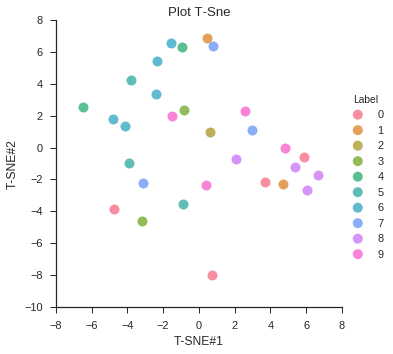

In [71]:
test_df_sample=t_sne_test[0:30]
test_df_sample=test_df_sample[test_df_sample.Label < 10]

sb.set_context("notebook", font_scale=1.1)
sb.set_style("ticks")


sb.lmplot('A','B',
           data=test_df_sample, 
           fit_reg=False, 
           hue="Label",  
           scatter_kws={"marker": "Label", 
                        "s": 100})
plt.title('Plot T-Sne')
plt.xlabel('T-SNE#1')
plt.ylabel('T-SNE#2')

USE PCA testing....

In [77]:
reduced_train_data = PCA(n_components=2).fit_transform(encoded_train_imgs)
reduced_test_data = PCA(n_components=2).fit_transform(encoded_test_imgs)


In [79]:
print (reduced_train_data.shape)
print (reduced_test_data.shape)

(50000, 2)
(10000, 2)


In [91]:
train_df = pd.DataFrame(reduced_train_data)

In [92]:
train_df['Label'] = pd.DataFrame(y_train_pd)

In [93]:
train_df.head()

,0,1,Label
0,-1.291581,0.963384,6
1,0.415225,-0.184935,9
2,2.403721,-3.203566,9
3,-2.847926,-0.082212,4
4,-0.483841,-1.453132,1


In [132]:
test_df = pd.DataFrame(reduced_test_data,columns=list('AB'))
test_df['Label'] = pd.DataFrame(y_test_pd)
test_df.head()

,A,B,Label
0,-1.190104,0.119346,3
1,3.227087,-2.414911,8
2,1.220554,-2.498285,8
3,1.622689,-1.168158,0
4,-1.561302,1.161288,6


In [96]:
# Create 
kmeans = KMeans(n_clusters=10)
kmeans.fit(reduced_train_data) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [97]:
kmeans.cluster_centers_.shape

(10, 2)

In [109]:
kmeans.labels_.shape

(50000,)

In [110]:
km_predicted = kmeans.predict(reduced_test_data)
cluster= km_predicted
print (cluster.shape)
cluster=cluster.reshape(10000,1)
print (cluster.shape)

(10000,)
(10000, 1)


In [114]:
np.unique(cluster)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [115]:
np.unique(test_df.Label)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [133]:
test_df['Cluster'] = pd.DataFrame(cluster)
test_df.head(10)

,A,B,Label,Cluster
0,-1.190104,0.119346,3,5
1,3.227087,-2.414911,8,9
2,1.220554,-2.498285,8,2
3,1.622689,-1.168158,0,2
4,-1.561302,1.161288,6,6
5,-1.239977,-0.111418,6,5
6,-2.427184,-0.303687,1,3
7,-2.415796,-0.045187,6,3
8,1.376448,1.398137,3,0
9,1.974693,-1.336996,1,2


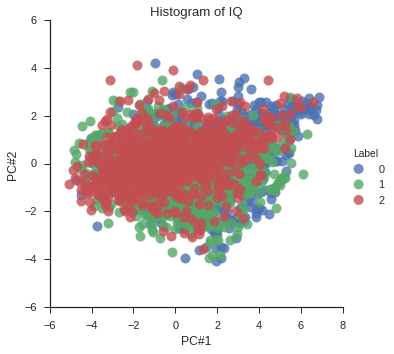

In [148]:
test_df_sample=test_df[0:10000]
test_df_sample=test_df_sample[test_df_sample.Label < 3]

sb.set_context("notebook", font_scale=1.1)
sb.set_style("ticks")


sb.lmplot('A','B',
           data=test_df_sample, 
           fit_reg=False, 
           hue="Label",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Histogram of IQ')
plt.xlabel('PC#1')
plt.ylabel('PC#2')

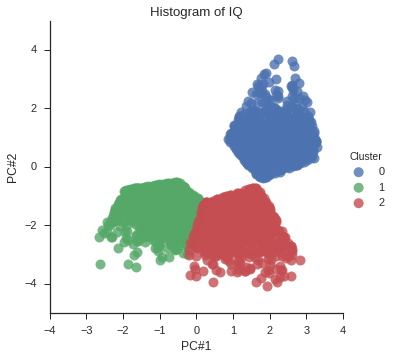

In [150]:
test_df_sample=test_df[0:10000]
test_df_sample=test_df_sample[test_df_sample.Cluster < 3]

sb.set_context("notebook", font_scale=1.1)
sb.set_style("ticks")


sb.lmplot('A','B',
           data=test_df_sample, 
           fit_reg=False, 
           hue="Cluster",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Histogram of IQ')
plt.xlabel('PC#1')
plt.ylabel('PC#2')

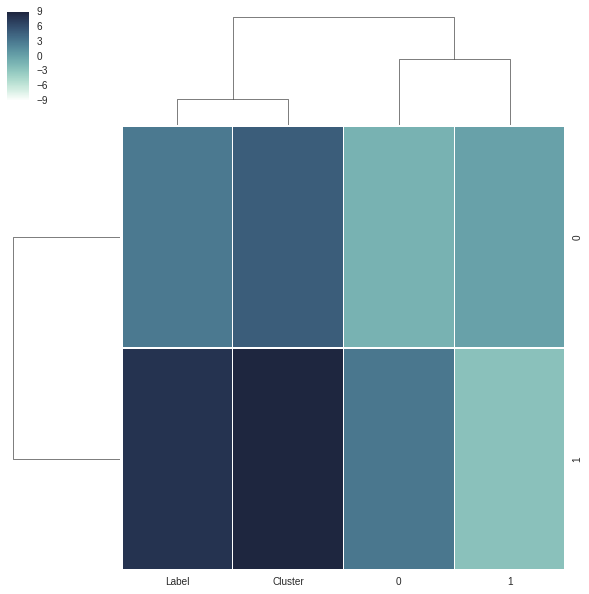

In [120]:
cmap = sb.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sb.clustermap(test_df[0:2], cmap=cmap, linewidths=.5)

In [74]:
reduced_train_data = reduced_train_data[0:501,]

In [75]:
reduced_train_data.shape

(501, 2)

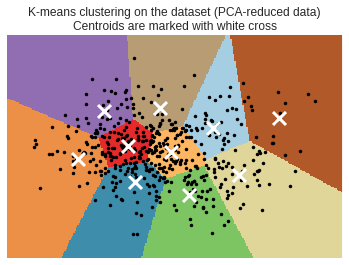

In [76]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .05    # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_train_data[:, 0].min() - 1, reduced_train_data[:, 0].max() + 1
y_min, y_max = reduced_train_data[:, 1].min() - 1, reduced_train_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_train_data[:, 0], reduced_train_data[:, 1], 'k.', markersize=7)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
raw_data['Cluster_Label'] = kmeans.labels_